<a href="https://colab.research.google.com/github/jerinSabrina/NLP-projects/blob/main/1_Spam_Message_Classification_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Prepocessing**

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [80]:
df = pd.read_csv('spam.tsv',sep='\t') #file are tap seperated, files name tsv and need to told sep type.


In [81]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


in dataset , data is labeled with ham and spam. and length and punctuation are also given.

In [82]:
#check missing data
df.isna().sum()


label      0
message    0
length     0
punct      0
dtype: int64

In [83]:
# check backside of data
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [84]:
#check statistical analysis
df.describe()


,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [85]:
#Check how many of data is ham or spam
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

The dataset is imbalanced. so we can check also the percentage of data ratio.

In [86]:
df.label.value_counts(normalize=True)

label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

As dataset are largely imbalanced. We need to make it balanced. For that one way to do that we simply grab a less portion of data from larger set of data. in this case from ham ,we will take 747 data to make it equal to spam.

In [87]:
#So we created two bucket to seperate the ham and spam labeled data. One bucket is for ham data. and another for spam data
df_ham = df[df['label'] == 'ham']
df_spam = df[df['label'] == 'spam']

df_ham.shape,df_spam.shape

((4825, 4), (747, 4))

In [88]:
#By using sampple function, we will take how many data we need to take.
df_ham = df_ham.sample(df_spam.shape[0])
df_ham.shape,df_spam.shape

((747, 4), (747, 4))

In [89]:
# Use the concat function instead of append
# Now the seperate two bucket append to one bucket named data as before
# Some issues can happen as same index.
# So we need to ignore the index.

data = pd.concat([df_ham, df_spam], ignore_index=True)
data.shape

(1494, 4)

Now make some visualization to understand the data.

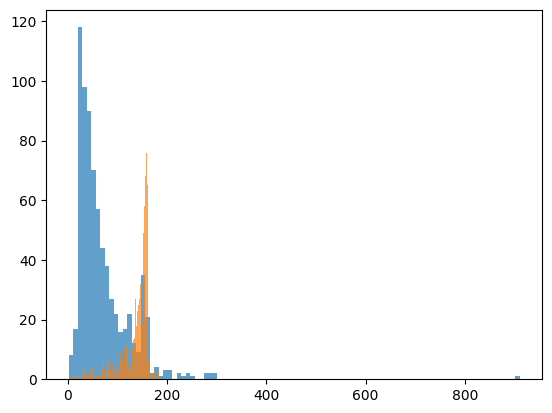

In [90]:
#histogram to check how data are distributed.Say ham data.
plt.hist(data[data['label']==  'ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']==  'spam']['length'], bins=100, alpha=0.7)
plt.show()

here, we can see, the majority of our ham message, resides in a category of 0 to 170. And the spam message resides on 100 to 200
We can also say, the higher length message has a high probability that it belongs to a spam category.  

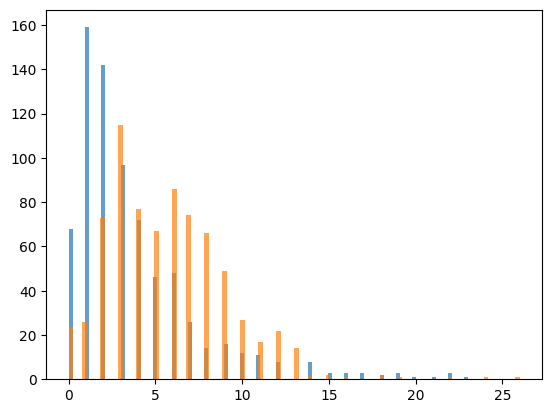

In [91]:
# NO significant differnce by using the feature punctuation.
plt.hist(data[data['label']==  'ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']==  'spam']['punct'], bins=100, alpha=0.7)
plt.show()

### split the data as training dataset and test dataet.

So the basic thumb rule behind is that you just segregate your data into two different buckets, like
a training dataset and a testing dataset, and never ever saw testing dataset to your model training.

Never ever use your testing dataset for the model training.

Because once you learn the model, the model got created, we will apply those testing dataset to know
about it, how good or accurate our model is.

In [92]:
data

,label,message,length,punct
0,ham,U're welcome... Caught u using broken english ...,54,7
1,ham,"Dude u knw also telugu..thts gud..k, gud nyt..",46,7
2,ham,Appt is at &lt;TIME&gt; am. Not my fault u don...,71,7
3,ham,I've not sent it. He can send me.,33,3
4,ham,Great. I was getting worried about you. Just k...,175,5
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# 70% data is for train and 30% data is for test

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle= True )

In [95]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1045,), (449,), (1045,), (449,))

# **2. Building the Model (Random Forest)**

So here we are dealing with the just text data only, and we just cannot throw all those textual data directly on a machine learning algorithm.

We have to convert some sort of encoding which will convert all those textual data into some sort of numbers.

Now, to do that, there are a number of methods are available, like a **bag of words model** or I would say **Tf-idf model**, and some of the deep learning based advanced models like a **word2Vec** or a **global vectors**.

So all those techniques eventually try to convert all those textual data into kinds of number which will try to preserve all those semantic relationship exists between the data.

The deep learning based model obviously works much better with accuracy, but we'll go with the o**ne encoding technique** which will convert all your ***text data into tf-idf vector*** that is nothing but a term frequency and inverse document frequency.

In [96]:
 from sklearn.feature_extraction.text import TfidfVectorizer # Tfidf Vector to extract the feature
 from sklearn.ensemble import RandomForestClassifier #Randomforest classifier

 from sklearn.pipeline import Pipeline  #pipeline object needed to run sklearn . part of sklearn pipeline

In [97]:
# Instead of creating two object ,we will create a pipeline object.
# Now, this random forest classifier contains a lot of hyper parameter. So if we want to improve this model, we can tune this hyper parameter.
#So let's just make it some hyper parameters like let's say n_estimator = 10.

classifier = Pipeline([('tfidf', TfidfVectorizer()),('rfclassifer', RandomForestClassifier(n_estimators= 10))]) #creating object


n_estimator = 10/100 , means Ten/ hundred different estimators, or I would say that is a ten/ hundred different decision tree will be created.

In [98]:
# Train the object using API of sklearn  = fit
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfclassifer', RandomForestClassifier(n_estimators=10))])

Now  Our model has trained. Traning process is finised. We need to use this classifier object and we are going to use this predict method.

# **3. Predicting the Result (Random Forest)**

In [99]:
y_prad = classifier.predict(X_test)

In [100]:
y_test , y_prad

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',

So analytically, how we can compare both of these result ?
To do those things , There is one definite methods are available to get the accuracy classification problem.

So one is like a **full detailed classification report**.



In [101]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [102]:
accuracy_score(y_test, y_prad) # We got 91% accurate result. Our model is quite good.

0.910913140311804

In [105]:
print(confusion_matrix(y_test, y_prad))

[[223   4]
 [ 36 186]]


In [106]:
print(classification_report(y_test, y_prad))

              precision    recall  f1-score   support

         ham       0.86      0.98      0.92       227
        spam       0.98      0.84      0.90       222

    accuracy                           0.91       449
   macro avg       0.92      0.91      0.91       449
weighted avg       0.92      0.91      0.91       449



# **4. Building the Model (SVM)**

In [107]:
from sklearn.svm import SVC


In [109]:
classifier_svm = Pipeline([('tfidf', TfidfVectorizer()),('svc', SVC( C = 100, gamma = 'auto'))])

In [110]:
classifier_svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svc', SVC(C=100, gamma='auto'))])

# **5. Predicting the Result (SVM)**

In [112]:
y_pred = classifier_svm.predict(X_test)

In [113]:
accuracy_score(y_test, y_pred)

0.9599109131403119

In [114]:
confusion_matrix(y_test, y_pred)

array([[226,   1],
       [ 17, 205]])

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       227
        spam       1.00      0.92      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



# Testing the two model SVM and RandomForest to check



So now time to test our newly created or handcrafted created as testing dataset to test our two model.

In [130]:
test1 = ' Hi ! I hope this mail finds you well. I just need the book you borrowed. regards Sab'
test2 = 'Congratulations! you won a lottery ticket worth $1 million ! To calim call on 22222'

In [131]:
print (classifier.predict([test1]))
print (classifier.predict([test2]))

['ham']
['spam']


In [132]:
print(classifier_svm.predict([test1]))
print(classifier_svm.predict([test2]))

['ham']
['spam']
